In [3]:
print(u"\x0B")

In [4]:
print(u"\x41\x0A\x42\x0C\x43\x00\x44")
print(u"\x41\x0D\x45\x46\x20\x47")

A
BC D
EF G


In [5]:
print(u"\x14\x35")

5


In [6]:
print(u"\x28\x29\x3C\x3E\x25")

()<>%


In [5]:
b'\x28'.decode("utf-8") == '('

True

In [6]:
print('\123\124\0321')

ST1


In [7]:
print(u"\x4E\x6F\x76\x20\x73\x68\x6D\x6f\x7a\x20\x6b\x61\x20\x70\66ffx70\x2e")
print(u"\x90\x1f\xa0")

Nov shmoz ka p6ffx70.
 


In [8]:
b'\x4E\x6F\x76\x20\x73\x68\x6D\x6f\x7a\x20\x6b\x61\x20\x70\66ffx70\x2e'.decode("utf-8")

'Nov shmoz ka p6ffx70.'

In [1]:
import io
import numpy as np
import cv2
import fitz
from PIL import Image
from matplotlib import pyplot as plt

In [10]:
#doc = fitz.open("resource/ANA領収書.pdf")

In [11]:
page = doc[0]

NameError: name 'doc' is not defined

In [12]:
pix = page.get_pixmap()

NameError: name 'page' is not defined

In [13]:
#pix.save("resource/pdf2pix.png")
#img = cv2.imread("resource/pdf2pix.png")
img = np.asarray(Image.open(io.BytesIO(pix.tobytes())))

NameError: name 'pix' is not defined

In [14]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
nega_img = cv2.bitwise_not(gray_img)

NameError: name 'img' is not defined

In [15]:
plt.imshow(nega_img, cmap="gray")
plt.show()

NameError: name 'nega_img' is not defined

In [16]:
lines = cv2.HoughLinesP(nega_img, rho=1, theta=np.pi/360, threshold=80, minLineLength=50, maxLineGap=0)

NameError: name 'nega_img' is not defined

In [17]:
lines.__len__()

NameError: name 'lines' is not defined

NameError: name 'gray_img' is not defined

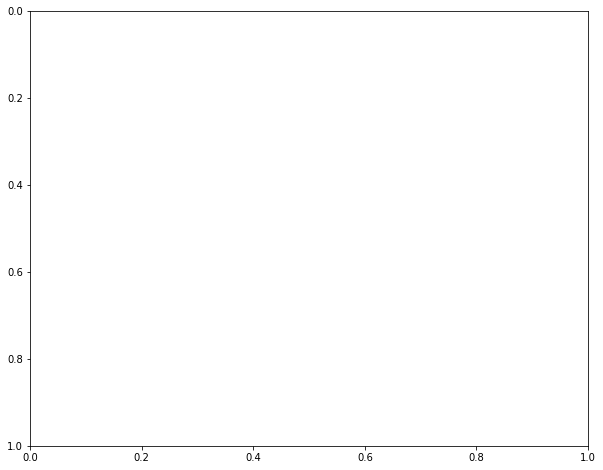

In [18]:
fig = plt.figure(figsize=(10,8))
plt.gca().invert_yaxis()
plt.imshow(gray_img, cmap="gray")
for line in lines:
    line = line[0]
    plt.plot([line[0],line[2]], [line[1], line[3]], color="red")
plt.show()

In [19]:
help(page.get_pixmap)

NameError: name 'page' is not defined

In [20]:
# constants
white = np.array([255,255,255])
white_threshold_dist = 88


def check_index(matrix, loc):
    max_row = matrix.shape[0]
    max_col = matrix.shape[1]
    return 0 <= loc[0] <= max_row and 0 <= loc[1] <= max_col

def group_cls_joints(figure_cls_joints):
    figure_cls_groups = []
    while True:
        try:
            joint = figure_cls_joints.pop()
        except IndexError:
            break
        cls1, cls2 = joint
        cls1_group = cls2_group = None
        for cls_group in figure_cls_groups: 
            if cls1 in cls_group:
                cls1_group = cls_group
            if cls2 in cls_group:
                cls2_group = cls_group
            if cls1_group is not None and cls2_group is not None:
                break
        if cls1_group is not None and cls2_group is not None:
            if cls1_group == cls2_group:
                continue
            new_group = cls1_group.union(cls2_group)
            figure_cls_groups.remove(cls1_group)
            figure_cls_groups.remove(cls2_group)
            figure_cls_groups.append(new_group)
        elif cls1_group is not None:
            new_group = cls1_group.union(joint)
            figure_cls_groups.remove(cls1_group)
            figure_cls_groups.append(new_group)
        elif cls2_group is not None:
            new_group = cls2_group.union(joint)
            figure_cls_groups.remove(cls2_group)
            figure_cls_groups.append(new_group)
        else:
            figure_cls_groups.append(set(joint))
    return figure_cls_groups


# def explore_figure(image, figure, loc, has_explored):
#     if (not check_index(has_explored, loc)) or has_explored[loc]:
#         return
#     if np.linalg.norm(img[loc] - white) > white_threshold_dist:
#         figure.append(loc)
#         has_explored[loc] = True
#         explore_figure(image, figure, (loc[0]+1, loc[1]), has_explored)  # below pixel
#         explore_figure(image, figure, (loc[0], loc[1]+1), has_explored)  # right pixel
#         explore_figure(image, figure, (loc[0]-1, loc[1]), has_explored)  # upper pixel
#         explore_figure(image, figure, (loc[0], loc[1]-1), has_explored)  # left pixel
#     else:
#         return
    
#     for 


row, col, _ = img.shape
figures = []
figure_counter = 0
figure_classifier = np.full(img.shape[:2], -1)
figure_cls_joints = []

for r in range(row):
    for c in range(col):
        upper = (r-1,c)
        left  = (r,c-1)
        upper_cls = figure_classifier[upper] if check_index(img, upper) else -1
        left_cls  = figure_classifier[left]  if check_index(img, left)  else -1
        
        if np.linalg.norm(img[r,c] - white) > white_threshold_dist:
            if upper_cls != -1 and left_cls != -1 and upper_cls != left_cls:
                # This pixel is a joint pixel of 2 figures
                cls1 = min(upper_cls, left_cls)
                cls2 = max(upper_cls, left_cls)
                figure_cls_joints.append( (cls1,cls2) )
                figure_classifier[r,c] = min(upper_cls, left_cls)
            elif upper_cls != -1:
                # This pixel is a component of the figure of the upper pixel
                figure_classifier[r,c] = upper_cls
            elif left_cls != -1:
                # This pixel is a component of the figure of the left  pixel
                figure_classifier[r,c] = left_cls
            else:
                # A pixel which might be a component of a new figure
                figure_classifier[r,c] = figure_counter
                figure_counter += 1
                

print(f"figure_counter = {figure_counter}")
print("figure_cls_joints:")
print(figure_cls_joints)
plt.imshow(figure_classifier)
plt.show()

figure_cls_groups = group_cls_joints(figure_cls_joints)


for r in range(row):
    for c in range(col):
        cls = figure_classifier[r,c]
        for new_cls, cls_group in enumerate(figure_cls_groups):
            if cls in cls_group:
                figure_classifier[r,c] = new_cls

print(figure_cls_groups)
print(figure_classifier)

NameError: name 'img' is not defined

In [21]:
len(figure_cls_groups)
fig = plt.figure(figsize=(10,8))
plt.imshow(figure_classifier, cmap="gray")
plt.show()

NameError: name 'figure_cls_groups' is not defined

In [22]:
pix2 = page.get_pixmap(dpi=100)
pix2.save("resource/pdf2pix02.png")

NameError: name 'page' is not defined

In [2]:
#_img2 = Image.open("resource/pdf2pix02.png")
img2 = np.array(_img2)

NameError: name 'np' is not defined

In [3]:
_img2.close()

NameError: name '_img2' is not defined

In [4]:
%matplotlib notebook
plt.imshow(img2);plt.show()

NameError: name 'plt' is not defined

In [5]:
def get_drawing_pix(page):
    paths = page.get_drawings()  # extract existing drawings
    outpdf = fitz.open()
    outpage = outpdf.new_page(width=page.rect.width, height=page.rect.height)
    shape = outpage.new_shape()  # make a drawing canvas for the output page

    for path in paths:
        for item in path["items"]:  # these are the draw commands
            if item[0] == "l":  # line
                shape.draw_line(item[1], item[2])
            elif item[0] == "re":  # rectangle
                shape.draw_rect(item[1])
            elif item[0] == "qu":  # quad
                shape.draw_quad(item[1])
            elif item[0] == "c":  # curve
                shape.draw_bezier(item[1], item[2], item[3], item[4])
            else:
                raise ValueError("unhandled drawing", item)

        shape.finish(
            fill=path["fill"],  # fill color
            color=path["color"],  # line color
            dashes=path["dashes"],  # line dashing
            even_odd=path.get("even_odd", True),  # control color of overlaps
            closePath=path["closePath"],  # whether to connect last and first point
            lineJoin=path["lineJoin"],  # how line joins should look like
            lineCap=max(path["lineCap"]),  # how line ends should look like
            width=path["width"],  # line width
            stroke_opacity=path.get("stroke_opacity", 1),  # same value for both
            fill_opacity=path.get("fill_opacity", 1),  # opacity parameters
            )
    shape.commit()
    return outpage.get_pixmap()

pixmap = get_drawing_pix(page)
img = np.asarray(Image.open(io.BytesIO(pixmap.tobytes())))
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, img_bin = cv2.threshold(img_gray, 210, 255, cv2.THRESH_BINARY)

%matplotlib inline
fig = plt.figure(figsize=(10,8))
plt.imshow(img_bin, cmap="gray")
plt.show()

NameError: name 'page' is not defined

In [6]:
paths = page.get_drawings()
outpdf2 = fitz.open()
outpage2 = outpdf2.new_page(width=page.rect.width, height=page.rect.height)
shape2 = outpage2.new_shape()
for path in paths:
    rect = path["rect"]
    if 650 < rect.x0 < 1200 and 650 < rect.x1 < 1200 and \
       200 < rect.y0 < 400  and 200 < rect.y1 < 400:
        print(f"---------{path['rect']}-------------")
        print(f"fill: {path['fill']}")
        for item in path["items"]:
            shape2.draw_rect(item[1])
        shape2.finish(
            fill=path["fill"],  # fill color
            color=path["color"],  # line color
            dashes=path["dashes"],  # line dashing
            even_odd=path.get("even_odd", True),  # control color of overlaps
            closePath=path["closePath"],  # whether to connect last and first point
            lineJoin=path["lineJoin"],  # how line joins should look like
            lineCap=max(path["lineCap"]),  # how line ends should look like
            width=path["width"],  # line width
            stroke_opacity=path.get("stroke_opacity", 1),  # same value for both
            fill_opacity=path.get("fill_opacity", 1),  # opacity parameters
        )
    shape2.commit()
partial_pixmap = outpage2.get_pixmap()
partial_img = np.asarray(Image.open(io.BytesIO(partial_pixmap.tobytes())))
partial_img_gray = cv2.cvtColor(partial_img, cv2.COLOR_RGB2GRAY)
ret, partial_img_bin = cv2.threshold(partial_img_gray, 210, 255, cv2.THRESH_BINARY)
plt.imshow(partial_img_bin, cmap="gray")
plt.show()

NameError: name 'page' is not defined

In [7]:
corners = cv2.cornerHarris(img_bin, 3, 3, 0.04)
corners = cv2.dilate(corners, None)
img_cp = img.copy()
img_cp[corners > corners.max()*0.01] = [255,0,0]

fig = plt.figure(figsize=(10,8))
#plt.imshow(img_cp[850:900,200:250])
plt.imshow(img_cp)
plt.show()

NameError: name 'cv2' is not defined

In [8]:
scaled = (corners - corners.min()) * 255 / (corners.max()-corners.min())
scaled = scaled.astype(np.uint8)
%matplotlib notebook
plt.imshow(scaled, cmap="gray")
plt.show()

NameError: name 'corners' is not defined

In [9]:
corner_centers = []

corners_bin = np.zeros_like(corners, dtype=np.uint8)
corners_bin[corners > corners.max()*0.1] = 255
corner_contours, corner_hierarchy = cv2.findContours(corners_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cont in corner_contours:
    M = cv2.moments(cont)
    cx = M["m10"] / M["m00"]
    cy = M["m01"] / M["m00"]
    corner_centers.append([cx,cy])
corner_centers = np.array(corner_centers)
print(corner_centers.shape)

NameError: name 'np' is not defined

In [10]:
plt.scatter(corner_centers[:,0], np.ones(corner_centers.shape[0]))
plt.show()

NameError: name 'plt' is not defined

In [11]:
corners_cnt_img = np.zeros_like(corners_bin, dtype=np.uint8)
corners_cnt_img = cv2.drawContours(corners_cnt_img, corner_contours, -1, 255, 2)
%matplotlib notebook
plt.imshow(corners_cnt_img, cmap="gray")
plt.show()

NameError: name 'np' is not defined

In [12]:
contours_table, hierarchy_table = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours_table))
contours_table_img = np.zeros_like(img_bin, dtype=np.uint8)
contours_table_img = cv2.drawContours(contours_table_img, contours_table, -1, 255, -1)
plt.imshow(contours_table_img, cmap="gray")
plt.show()

NameError: name 'cv2' is not defined

<IPython.core.display.Javascript object>


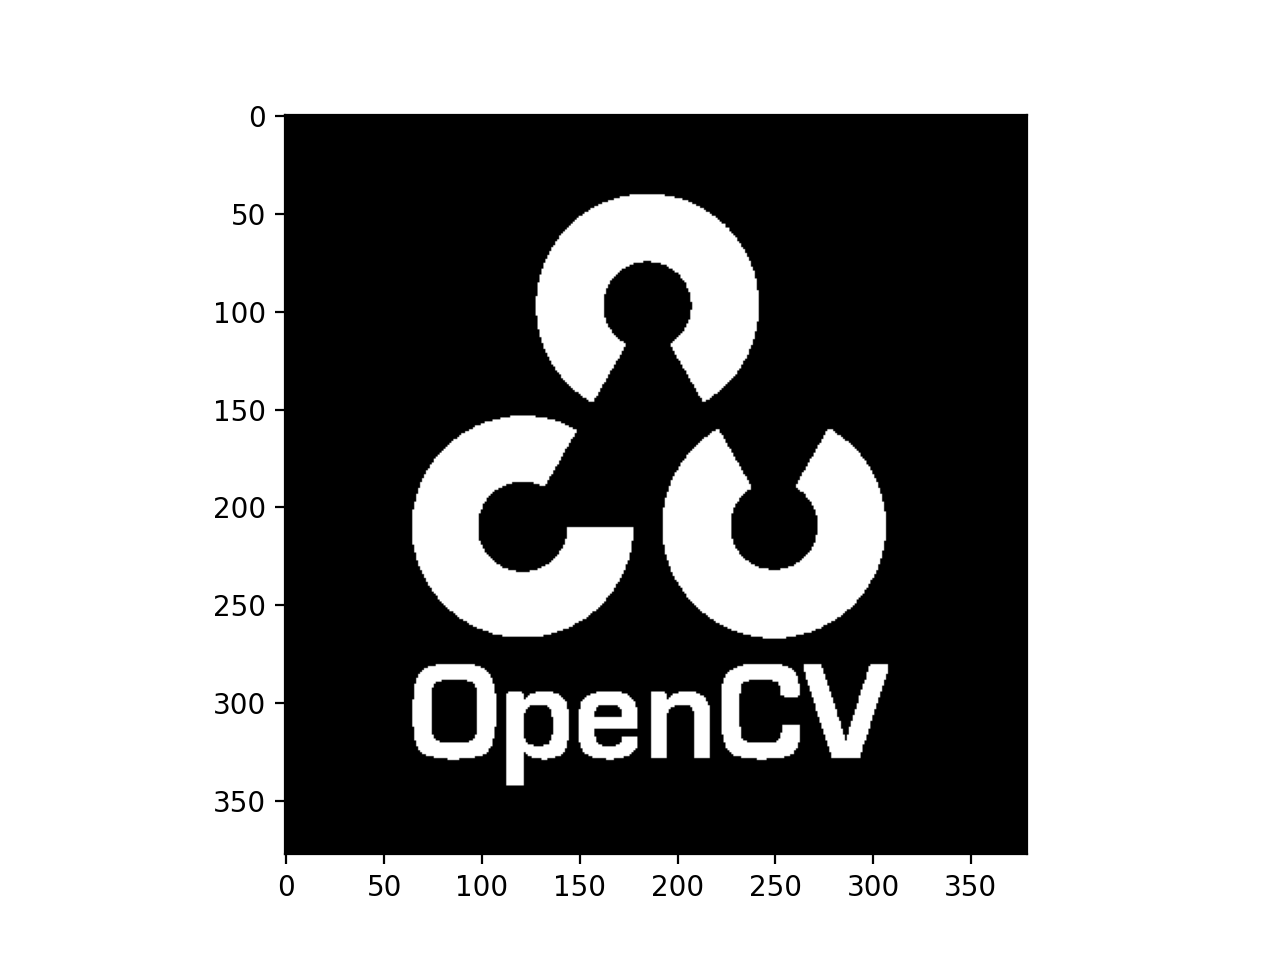

In [18]:
test_img = cv2.imread("resource/opencv.png")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img_gray = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)

ret, test_img_bin = cv2.threshold(test_img_gray, 127, 255, 0)
plt.imshow(test_img_bin, cmap="gray")

In [19]:
contours, hierarchy = cv2.findContours(test_img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

<IPython.core.display.Javascript object>


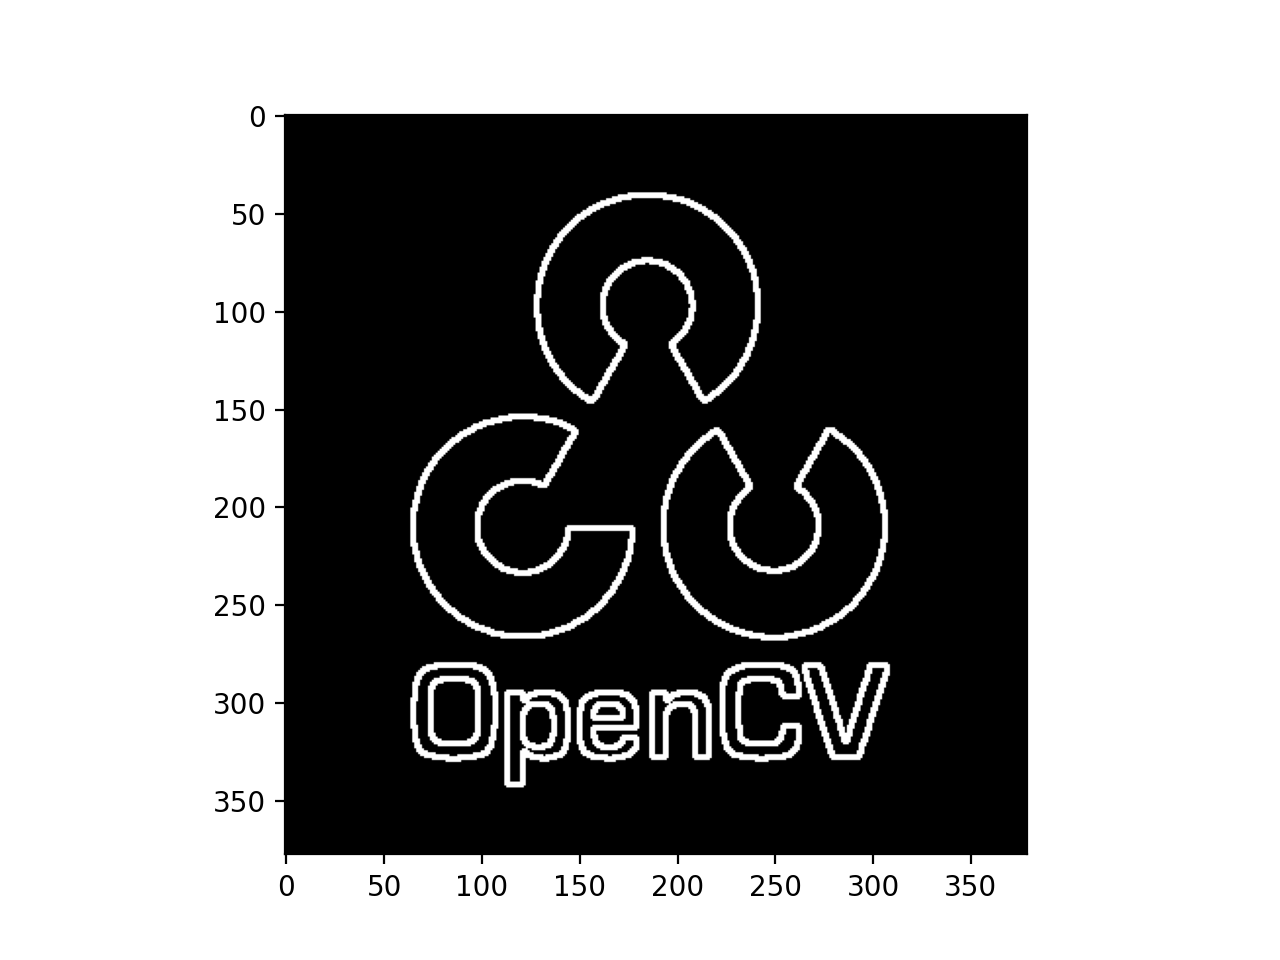

In [20]:
cnt_img = np.zeros_like(test_img_bin, dtype=np.uint8)
cnt_img = cv2.drawContours(cnt_img, contours, -1, 255, 2)
%matplotlib notebook
plt.imshow(cnt_img, cmap="gray")
plt.show()

12


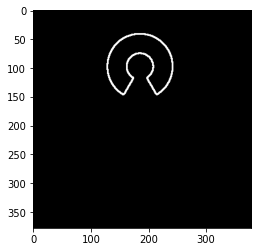

In [21]:
print(len(contours))
cnt_img = np.zeros_like(test_img_bin, dtype=np.uint8)
cnt_img = cv2.drawContours(cnt_img, contours, 11, 255, 2)
%matplotlib inline
plt.imshow(cnt_img, cmap="gray")
plt.show()

In [22]:
cnt = contours[11]
M = cv2.moments(cnt)
print(M)

{'m00': 7005.5, 'm10': 1293147.5, 'm01': 625488.1666666666, 'm20': 246294365.91666666, 'm11': 115440859.95833333, 'm02': 60851083.916666664, 'm30': 48267626590.850006, 'm21': 22035579640.083332, 'm12': 11228558672.616667, 'm03': 6346029109.25, 'mu20': 7591852.64049077, 'mu11': -18202.06501737237, 'mu02': 5004185.531108499, 'mu30': 1305261.314529419, 'mu21': 51833228.29247081, 'mu12': -712141.2543185949, 'mu03': 19321438.742378235, 'nu20': 0.1546925843274873, 'nu11': -0.00037088766220471075, 'nu02': 0.1019659401886588, 'nu30': 0.0003177602898898274, 'nu21': 0.012618577954314989, 'nu12': -0.00017336774552026435, 'nu03': 0.004703721705013629}


In [23]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(f"moment center = ({cx}, {cy})")

moment center = (184, 89)


In [24]:
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt, True)
print(f"area = {area}")
print(f"perimeter = {perimeter}")

area = 7005.5
perimeter = 509.77164113521576


In [7]:
import io
import numpy as np
import pandas as pd
import cv2
import fitz
import pyocr
from PIL import Image
from matplotlib import pyplot as plt

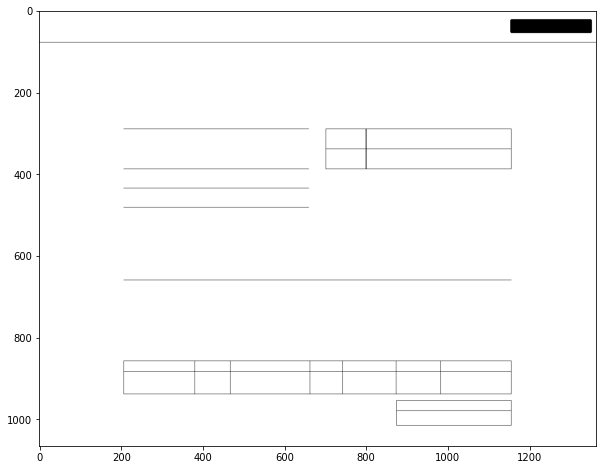

In [8]:
doc = fitz.open("resource/ANA領収書.pdf")
page = doc[0]

def get_drawing_pix(page):
    paths = page.get_drawings()  # extract existing drawings
    outpdf = fitz.open()
    outpage = outpdf.new_page(width=page.rect.width, height=page.rect.height)
    shape = outpage.new_shape()  # make a drawing canvas for the output page

    for path in paths:
        for item in path["items"]:  # these are the draw commands
            if item[0] == "l":  # line
                shape.draw_line(item[1], item[2])
            elif item[0] == "re":  # rectangle
                shape.draw_rect(item[1])
            elif item[0] == "qu":  # quad
                shape.draw_quad(item[1])
            elif item[0] == "c":  # curve
                shape.draw_bezier(item[1], item[2], item[3], item[4])
            else:
                raise ValueError("unhandled drawing", item)

        shape.finish(
            fill=path["fill"],  # fill color
            color=path["color"],  # line color
            dashes=path["dashes"],  # line dashing
            even_odd=path.get("even_odd", True),  # control color of overlaps
            closePath=path["closePath"],  # whether to connect last and first point
            lineJoin=path["lineJoin"],  # how line joins should look like
            lineCap=max(path["lineCap"]),  # how line ends should look like
            width=path["width"],  # line width
            stroke_opacity=path.get("stroke_opacity", 1),  # same value for both
            fill_opacity=path.get("fill_opacity", 1),  # opacity parameters
            )
    shape.commit()
    return outpage.get_pixmap()

pixmap = get_drawing_pix(page)
img = np.asarray(Image.open(io.BytesIO(pixmap.tobytes())))
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, img_bin = cv2.threshold(img_gray, 210, 255, cv2.THRESH_BINARY)

%matplotlib inline
fig = plt.figure(figsize=(10,8))
plt.imshow(img_bin, cmap="gray")
plt.show()

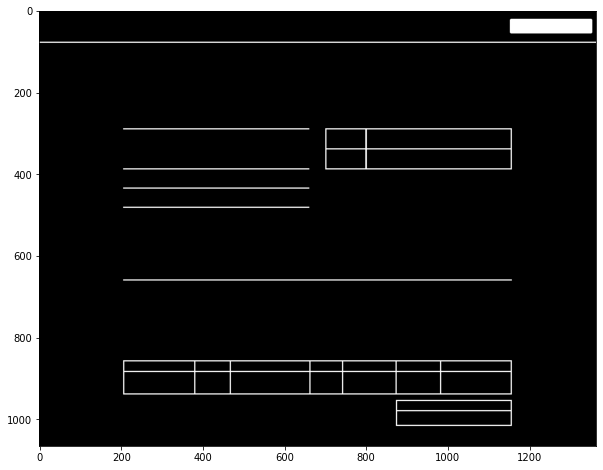

In [9]:
ret, img_bin_inv = cv2.threshold(img_gray, 210, 255, cv2.THRESH_BINARY_INV)
img_bin_dilate = cv2.dilate(img_bin_inv, None)
img_edge = cv2.Canny(img_bin_dilate, 10, 210)
fig = plt.figure(figsize=(10,8))
#plt.imshow(img_edge, cmap="gray")
plt.imshow(img_bin_dilate, cmap="gray")
plt.show()

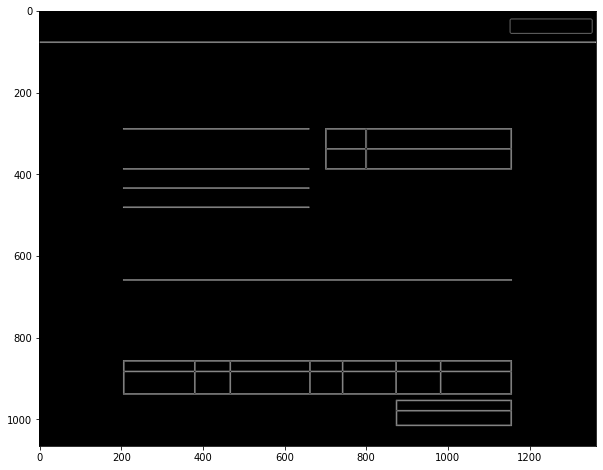

In [10]:
contours, hierarchy = cv2.findContours(img_bin_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#contours, hierarchy = cv2.findContours(img_edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_cp = np.zeros_like(img_edge)
cv2.drawContours(img_cp, contours, -1, 255, 1)
fig = plt.figure(figsize=(10,8))
plt.imshow(img_cp, cmap="gray");plt.show()

In [5]:
import re
from copy import deepcopy

class Cell():
    def __init__(self, bbox, content, row_group=None, col_group=None):
        self.bbox = bbox
        self.content = content
        if row_group is None:
            self.row_group = set()
        if col_group is None:
            self.col_group = set()
    
    def __getitem__(self, key):
        return self.__getattribute__(key)
    
    def __setitem__(self, key, value):
        self.__setattr__(key, value)
    
    def __repr__(self):
        return f"{self.bbox}: {self.content}: {self.row_group}"
    
    def width(self):
        return self.bbox[2] - self.bbox[0]
    
    def height(self):
        return self.bbox[3] - self.bbox[1]


class Table():
    def __init__(self, cells=None, relation_infer_func=None, **kwargs):
        self.cells = None
        self.cell_matrix = None
        self.shape = None
        if cells is not None:
            self.load_cells(cells, relation_infer_func)
    
    def __getitem__(self, idx):
        return self.cell_matrix[idx]
    
    @staticmethod
    def _group_cells(cells, relation_infer_func=None, **kwargs):
        '''Label cells which row and column they are.
        
        Label cells which row and column they are.
        
        Parameters
        ----------
        cells: list[Cell]
            list of Cell which represents the bbox of each cell
        relation_infer_func: callable
            function which infers relation between a cell and the other and shall return Enum CellRelation
        
        Return
        ------
        cg_list: list[Cell]
            list of Cell whose row_group and col_group are set
        '''
        if relation_infer_func is None:
            relation_infer_func = lambda c1,c2: CellRelation.NONE
        
        row_count = col_count = 0
        _cells = deepcopy(cells)
        
        # group cells by row
        processed_cells = []
        _cells = sorted(_cells, key=lambda cell: cell.height())
        for cur_cell in _cells:
            for p_cell in processed_cells:
                relation = relation_infer_func(cur_cell, p_cell, **kwargs)
                if relation in (CellRelation.SAME_ROW, CellRelation.PARTIALLY_SAME_ROW):
                    cur_cell["row_group"].update(p_cell["row_group"])
            if len(cur_cell["row_group"]) == 0:
                cur_cell["row_group"].add(row_count)
                row_count += 1
            processed_cells.append(cur_cell)
        
        # group cells by column
        processed_cells.clear()
        _cells = sorted(_cells, key=lambda cell: cell.width())
        for cur_cell in _cells:
            for p_cell in processed_cells:
                relation = relation_infer_func(cur_cell, p_cell, **kwargs)
                if relation in (CellRelation.SAME_COL, CellRelation.PARTIALLY_SAME_COL):
                    cur_cell["col_group"].update(p_cell["col_group"])
            if len(cur_cell["col_group"]) == 0:
                cur_cell["col_group"].add(col_count)
                col_count += 1
            processed_cells.append(cur_cell)
        
        return _cells
    
    @staticmethod
    def _sort_cellgroup_index(cells):
        '''Sort row group and column group of the cell in ordinal order
        
        Sort row group and column group of the cell in ordinal order
        
        Parameter
        ---------
        cg_list: list[dict{'bbox', 'row_group', 'col_group'}]
            list of dict which has cell's bbox, row group and column group
        
        Return
        ------
        None
        '''
        row_group_representatives = []
        col_group_representatives = []
        for cell in cells:
            row_group = next(iter(cell["row_group"]))
            col_group = next(iter(cell["col_group"]))
            if len(cell["row_group"]) == 1 and \
               row_group not in map(lambda cell: cell["row_group"], row_group_representatives):
                row_group_representatives.append( {"bbox": cell["bbox"], "row_group": row_group} )
            if len(cell["col_group"]) == 1 and \
               col_group not in map(lambda cell: cell["col_group"], col_group_representatives):
                col_group_representatives.append( {"bbox": cell["bbox"], "col_group": col_group} )
        
        row_group_representatives.sort(key=lambda cell: cell["bbox"][1])
        col_group_representatives.sort(key=lambda cell: cell["bbox"][0])
        row_index_map = dict( [(cell["row_group"], idx) for idx, cell in enumerate(row_group_representatives)] )
        col_index_map = dict( [(cell["col_group"], idx) for idx, cell in enumerate(col_group_representatives)] )
        
        for cell in cells:
            cell["row_group"] = { row_index_map[orig_idx] for orig_idx in cell["row_group"] }
            cell["col_group"] = { col_index_map[orig_idx] for orig_idx in cell["col_group"] }
        
    
    def load_cells(self, cells, relation_infer_func=None, **kwargs):
        '''Load cells to the table.
        
        Load cells to the table.
        
        Parameters
        ----------
        cells: list[Cell]
            list of dict which represents a bbox (x1,y1,x2,y2) and a content of the cell
        
        Returns
        -------
        shape of the table constructed from the cells
        '''
        self.cells = Table._group_cells(cells, relation_infer_func, **kwargs)
        Table._sort_cellgroup_index(self.cells)
        
        num_row = max([max(cg["row_group"]) for cg in self.cells]) + 1
        num_col = max([max(cg["col_group"]) for cg in self.cells]) + 1
        self.cell_matrix = np.full((num_row, num_col), None, dtype=object)
        
        for cell in self.cells:
            for row in cell["row_group"]:
                for col in cell["col_group"]:
                    self.cell_matrix[row,col] = cell
        self.shape = (num_row, num_col)
        return (num_row, num_col)
        
    
    def is_row_merged_cell(self, i, j):
        return True if len(self[i,j]["row_group"]) > 2 else False
    
    def is_col_merged_cell(self, i, j):
        return True if len(self[i,j]["col_group"]) > 2 else False


# for index, table in tables_with_group.items():
#     num_row = max( (max(cg["row_group"] for cg in table)) ) + 1
#     num_col = max( (max(cg["col_group"] for cg in table)) ) + 1
#     df = pd.DataFrame(np.full((num_row,num_col), None))
#     for cg in table:
#         for row in cg["row_group"]:
#             for col in cg["col_group"]:
#                 content = page.get_text(clip=cg["bbox"]).replace("\n", "")
#                 df.iloc[row,col] = content
#     print(df)
#     print("\n")

In [6]:
from enum import Enum

class CellRelation(Enum):
    NONE = 0
    SAME_CELL = 1
    SAME_ROW = 2
    SAME_COL = 3
    PARTIALLY_SAME_ROW = 4
    PARTIALLY_SAME_COL = 5
    INSIDE_CELL = 6
    #R_PARTIALLY_SAME_ROW = 4    # overlaps partially and horizontally with the right cell bigger
    #L_PARTIALLY_SAME_ROW = 5    # overlaps partially and horizontally with the left cell bigger
    #T_PARTIALLY_SAME_COL = 6    # overlaps partially and vertically with the top cell bigger
    #B_PARTIALLY_SAME_COL = 7    # overlaps partially and vertically with the bottom cell bigger
    #INSIDE_CELL = 8
    

def infer_cell_relation(cell1, cell2, threshold=0.9):
    sx1, sy1, ex1, ey1 = cell1["bbox"]
    sx2, sy2, ex2, ey2 = cell2["bbox"]
    w1, h1 = ex1 - sx1, ey1 - sy1
    w2, h2 = ex2 - sx2, ey2 - sy2
    overlap_x = min(w1, w2, ex1 - sx2, ex2 - sx1)
    overlap_y = min(h1, h2, ey1 - sy2, ey2 - sy1)
    
    row_relation = "none"
    col_relation = "none"
    if overlap_x > min(w1,w2)*threshold:
        # the two cell overlaps vertically
        if overlap_x > w1*threshold and overlap_x > w2*threshold:
            col_relation =  "same"
        else:
            col_relation = "partial"
    if overlap_y > min(h1,h2)*threshold:
        # the two cell overlaps horizontally
        if overlap_y > h1*threshold and overlap_y > h2*threshold:
            row_relation = "same"
        else:
            row_relation = "partial"
    
    if row_relation == "same" and col_relation == "same":
        return CellRelation.SAME_CELL
    elif row_relation != "none" and col_relation != "none":
        return CellRelation.INSIDE_CELL
    elif row_relation == "same":
        return CellRelation.SAME_ROW
    elif row_relation == "partial":
        return CellRelation.PARTIALLY_SAME_ROW
    elif col_relation == "same":
        return CellRelation.SAME_COL
    elif col_relation == "partial":
        return CellRelation.PARTIALLY_SAME_COL
    else:
        return CellRelation.NONE

#     elif row_relation == "partial":
#         if sx1 <= sx2:
#             return CellRelation.R_PARTIALLY_SAME_ROW if h1 < h2 else CellRelation.L_PARTIALLY_SAME_ROW
#         elif sx2 < sx1:
#             return CellRelation.R_PARTIALLY_SAME_ROW if h2 < h1 else CellRelation.L_PARTIALLY_SAME_ROW
#     elif col_relation == "same":
#         return CellRelation.SAME_COL
#     elif col_relation == "partial":
#         if sy1 <= sy2:
#             return CellRelation.B_PARTIALLY_SAME_COL if w1 < w2 else CellRelation.T_PARTIALLY_SAME_COL
#         elif sy2 < sy1:
#             return CellRelation.B_PARTIALLY_SAME_COL if w2 < w1 else CellRelation.T_PARTIALLY_SAME_COL
#     else:
#         return CellRelation.NONE


In [7]:
import re
from functools import lru_cache

class rdict(dict):
    '''Regex dictionary.
    
    This dictionary can take a regex pattern as a search key.
    '''
    def __getitem__(self, key):
        if isinstance(key, re.Pattern):
            pattern = key
            r = [v for k,v in self.items() if rdict._key_search(pattern, k)]
            if len(r) > 0:
                return r
            else:
                raise KeyError(key)
        else:
            return super().__getitem__(key)
    
    def rget(self, *keys):
        patterns = [rdict._key_compile(key) for key in keys]
        r = [v for k,v in self.items() 
             if all([rdict._key_search(p, k) for p in patterns])]
        if len(r) > 0:
            return r
        else:
            raise KeyError(key)
    
    def __contains__(self, key):
        if isinstance(key, re.Pattern):
            pattern = key
            m = [rdict._key_search(pattern, k) for k in self.keys()]
            return True if any(m) else False
        else:
            return super().__contains__(key)
    
    def is_rin(self, *keys):
        patterns = [rdict._key_compile(key) for key in keys]
        m = [all(rdict._key_search(p, k) for p in patterns) 
             for k in self.keys()]
        return True if any(m) else False
    
    @staticmethod
    @lru_cache(maxsize=128)
    def _key_compile(key):
        return re.compile(key)
    
    @staticmethod
    def _key_search(pattern, key):
        if isinstance(key, str):
            return re.search(pattern, key)
        elif isinstance(key, tuple):
            m = [pattern.search(k) for k in key]
            return m if any(m) else None

In [8]:
d = rdict()
d["foo"] = "nar"
d["baz"] = 100
d[("foo", "bar", "quot")] = 12345
d[340] = 1010

print(d)
p = re.compile("fo")
print(d[p])
print(d[340])
print(d.rget("ba*"))
print("fo" in d)
print(p in d)
print(d.is_rin("quot"))
print(d.rget("foo", "quo"))

{'foo': 'nar', 'baz': 100, ('foo', 'bar', 'quot'): 12345, 340: 1010}
['nar', 12345]
1010
[100, 12345]
False
True
True
[12345]


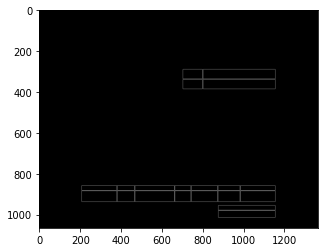

In [9]:
from collections import defaultdict

def get_bbox(contour):
    min_x = contour[:,0,0].min()
    max_x = contour[:,0,0].max()
    min_y = contour[:,0,1].min()
    max_y = contour[:,0,1].max()
    return (min_x, min_y, max_x, max_y)


#cells = defaultdict(list)
tables_raw = defaultdict(list)
img_cp = np.zeros_like(img_bin_dilate)
for i, cont in enumerate(contours):
    if hierarchy[0][i][2] == -1 and hierarchy[0][i][3] != -1:    # the most inside cell
        bbox = get_bbox(cont)
        #cells[hierarchy[0][i][3]].append(bbox)
        tables_raw[hierarchy[0][i][3]].append(Cell(bbox, ""))
        cv2.drawContours(img_cp, contours, i, 255, 1)
plt.imshow(img_cp, cmap="gray")
plt.show()

In [10]:
tables = []
for cells in tables_raw.values():
    table = Table(cells, infer_cell_relation)
    tables.append(table)

In [11]:
from itertools import combinations

# def width(cell):
#     return cell[2] - cell[0]

# def height(cell):
#     return cell[3] - cell[1]

# tables_with_group = defaultdict(list)
# for index, table in cells.items():
#     for cell in table:
#         cell_with_group = {"bbox":cell, "row_group":set(), "col_group":set()}
#         tables_with_group[index].append(cell_with_group)


# for index, table in tables_with_group.items():
#     row_count = col_count = 0
#     # group cells by row
#     processed_cgs = []
#     table = sorted(table, key=lambda cg: height(cg["bbox"]))
#     for cur_cg in table:
#         for p_cg in processed_cgs:
#             relation = infer_cell_relation(cur_cg["bbox"], p_cg["bbox"])
#             if relation in (CellRelation.SAME_ROW, CellRelation.PARTIALLY_SAME_ROW):
#                 cur_cg["row_group"].update(p_cg["row_group"])
#         if len(cur_cg["row_group"]) == 0:
#             cur_cg["row_group"].add(row_count)
#             row_count += 1
#         processed_cgs.append(cur_cg)
    
#     # group cells by column
#     processed_cgs.clear()
#     table = sorted(table, key=lambda cg: width(cg["bbox"]))
#     for cur_cg in table:
#         for p_cg in processed_cgs:
#             relation = infer_cell_relation(cur_cg["bbox"], p_cg["bbox"])
#             if relation in (CellRelation.SAME_COL, CellRelation.PARTIALLY_SAME_COL):
#                 cur_cg["col_group"].update(p_cg["col_group"])
#         if len(cur_cg["col_group"]) == 0:
#             cur_cg["col_group"].add(col_count)
#             col_count += 1
#         processed_cgs.append(cur_cg)
            

In [12]:
table[1,0]

(703, 338, 799, 385): : {1}

<IPython.core.display.Javascript object>


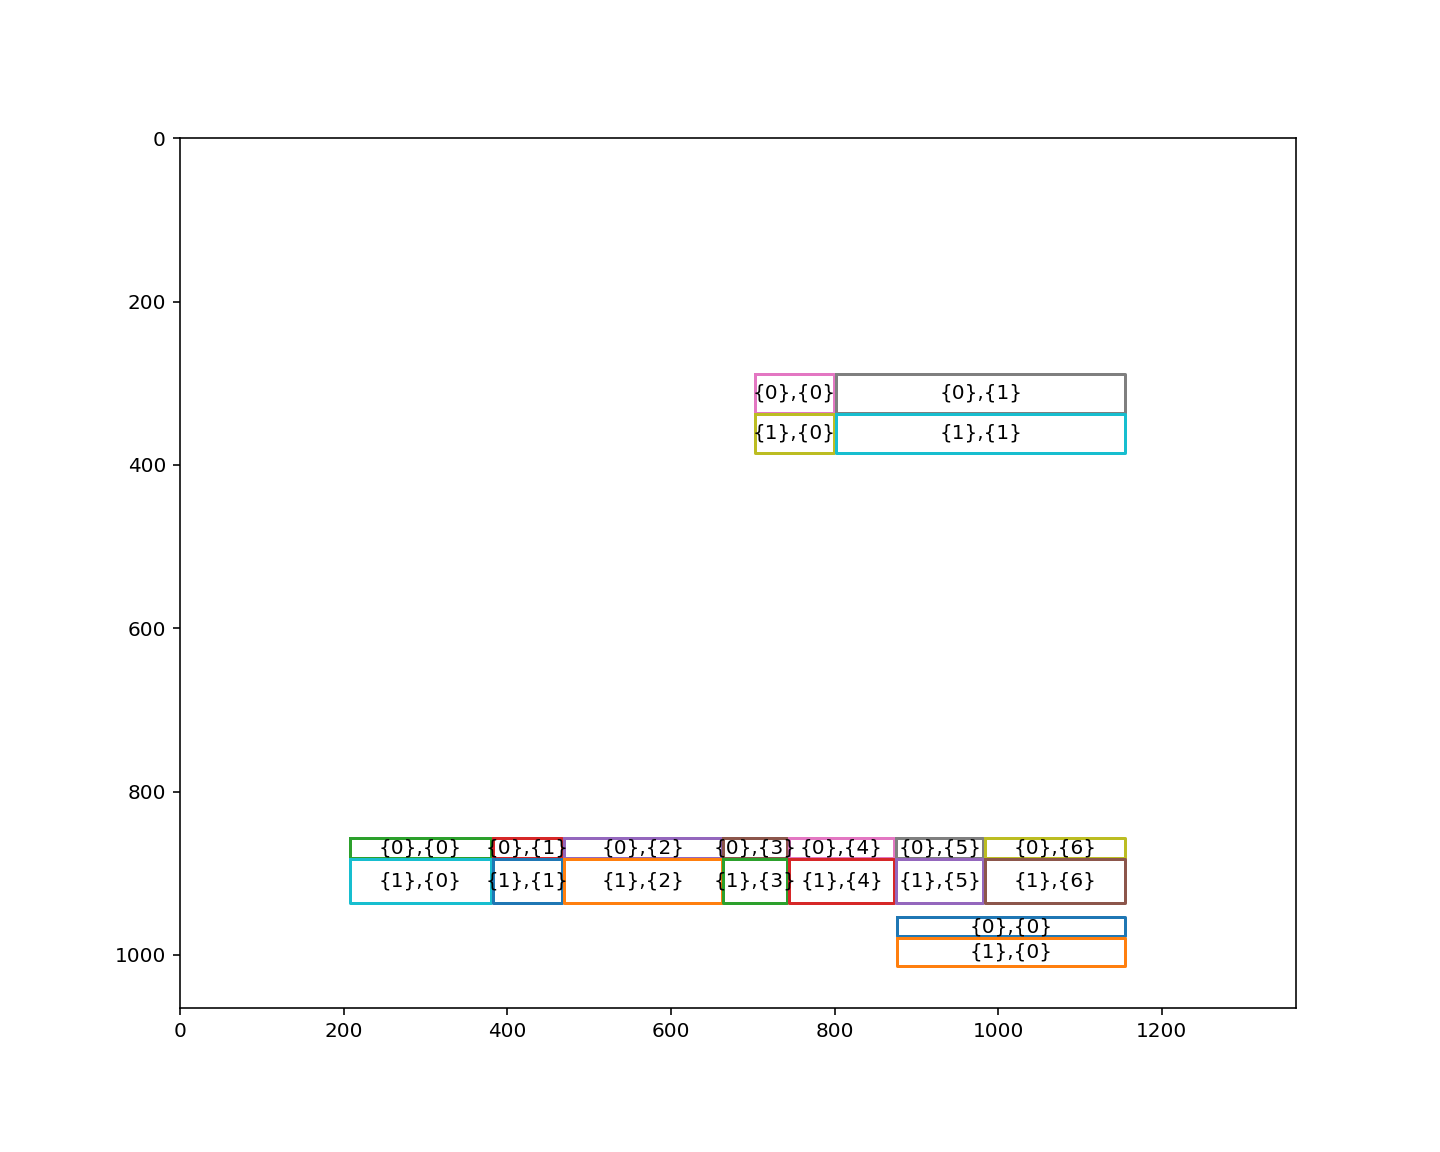

In [13]:
def plot_square(ax=plt, bbox=(0,0,1,1), label=None):
    p1 = [bbox[0],bbox[1]]
    p2 = [bbox[2],bbox[1]]
    p3 = [bbox[2],bbox[3]]
    p4 = [bbox[0],bbox[3]]
    ps = np.array([p1,p2,p3,p4,p1])
    ax.plot(ps[:,0], ps[:,1])
    if label is not None:
        cx = (bbox[0] + bbox[2])/2
        cy = (bbox[1] + bbox[3])/2
        ax.text(cx, cy, label, ha="center", va="center")
    return

# %matplotlib notebook
# fig, ax = plt.subplots(figsize=(10,8))
# for idx,table in tables_with_group.items():
#     for c in table:
#         plot_square(ax, c["bbox"], f"({list(c['row_group'])[0]},{list(c['col_group'])[0]})")
# ax.set_xlim(0, 1364)
# ax.set_ylim(1065, 0)
# plt.show()

%matplotlib notebook
fig, ax = plt.subplots(figsize=(10,8))
for table in tables:
    nrow,ncol = table.shape
    for i in range(nrow):
        for j in range(ncol):
            cell = table[i,j]
            plot_square(ax, cell["bbox"], f"{cell['row_group']},{cell['col_group']}")
ax.set_xlim(0,1364)
ax.set_ylim(1065,0)
plt.show()

In [14]:
# for index, table in tables_with_group.items():
#     row_group_representatives = []
#     col_group_representatives = []
#     for cg in table:
#         row_group = next(iter(cg["row_group"]))
#         col_group = next(iter(cg["col_group"]))
#         if len(cg["row_group"]) == 1 and \
#            row_group not in map(lambda cg: cg["row_group"], row_group_representatives):
#             row_group_representatives.append( {"bbox": cg["bbox"], "row_group": row_group} )
#         if len(cg["col_group"]) == 1 and \
#            col_group not in map(lambda cg: cg["col_group"], col_group_representatives):
#             col_group_representatives.append( {"bbox": cg["bbox"], "col_group": col_group} )
    
#     row_group_representatives.sort(key=lambda cg: cg["bbox"][1])
#     col_group_representatives.sort(key=lambda cg: cg["bbox"][0])
#     row_index_map = dict( [(cg["row_group"], idx) for idx, cg in enumerate(row_group_representatives)] )
#     col_index_map = dict( [(cg["col_group"], idx) for idx, cg in enumerate(col_group_representatives)] )
    
#     for cg in table:
#         cg["row_group"] = sorted([row_index_map[orig_idx] for orig_idx in cg["row_group"]])
#         cg["col_group"] = sorted([col_index_map[orig_idx] for orig_idx in cg["col_group"]])
            

((47, 34), (153, 85)) : 合計
((169, 34), (264, 85)) : 金額


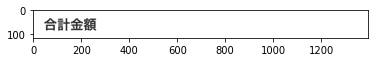

In [15]:
tools = pyocr.get_available_tools()
tool = tools[0]


pix_orig = page.get_pixmap(matrix=fitz.Matrix(5.0,5.0))
img_orig = Image.open(io.BytesIO(pix_orig.tobytes()))
img_partial = img_orig.crop((5*i for i in tables[0][0,0]["bbox"]))
builder = pyocr.builders.WordBoxBuilder(tesseract_layout=6)
word_boxes = tool.image_to_string(img_partial, lang="jpn", builder=builder)
for wb in word_boxes:
    print(f"{wb.position} : {wb.content}")
# builder = pyocr.tesseract.DigitBuilder(tesseract_layout=6)
# digits = tool.image_to_string(img, lang="jpn", builder=builder)
# print(digits)
%matplotlib inline
plt.imshow(img_partial)
plt.show()

In [16]:
builder2 = pyocr.builders.TextBuilder(tesseract_layout=6)
for idx,table in enumerate(tables):
    print(f"table[{idx}]")
    for cell in table.cells:
        img_partial = img_orig.crop((5*x for x in cell["bbox"]))
        results = tool.image_to_string(img_partial, lang="jpn", builder=builder)
        cell["content"] = "".join([result.content for result in results])
        print(cell)

table[0]
(876, 954, 1155, 977): 合計金額: {0}
(876, 979, 1155, 1013): \16,470-: {1}
table[1]
(664, 857, 742, 881): クラス: {0}
(664, 883, 742, 936): 普通席: {1}
(382, 857, 467, 881): 便名: {0}
(382, 883, 467, 936): ANA3863ぅ: {1}
(875, 857, 982, 881): 運賃額等(税込): {0}
(875, 883, 982, 936): \16,470-: {1}
(744, 857, 873, 881): 運賃: {0}
(744, 883, 873, 936): スーパーバリュー55K: {1}
(984, 857, 1155, 881): 運賃適用基準日: {0}
(984, 883, 1155, 936): 2022年10月03日(月): {1}
(208, 857, 380, 881): 搭乗日: {0}
(208, 883, 380, 936): 2022年11月27日(日): {1}
(469, 857, 662, 881): 区間: {0}
(469, 883, 662, 936): 東京(羽田)-北九州: {1}
table[2]
(703, 338, 799, 385): 照会番号: {1}
(703, 289, 799, 336): 航空券番号: {0}
(802, 338, 1155, 385): PEHRDP: {1}
(802, 289, 1155, 336): 1010333362824015: {0}


<IPython.core.display.Javascript object>


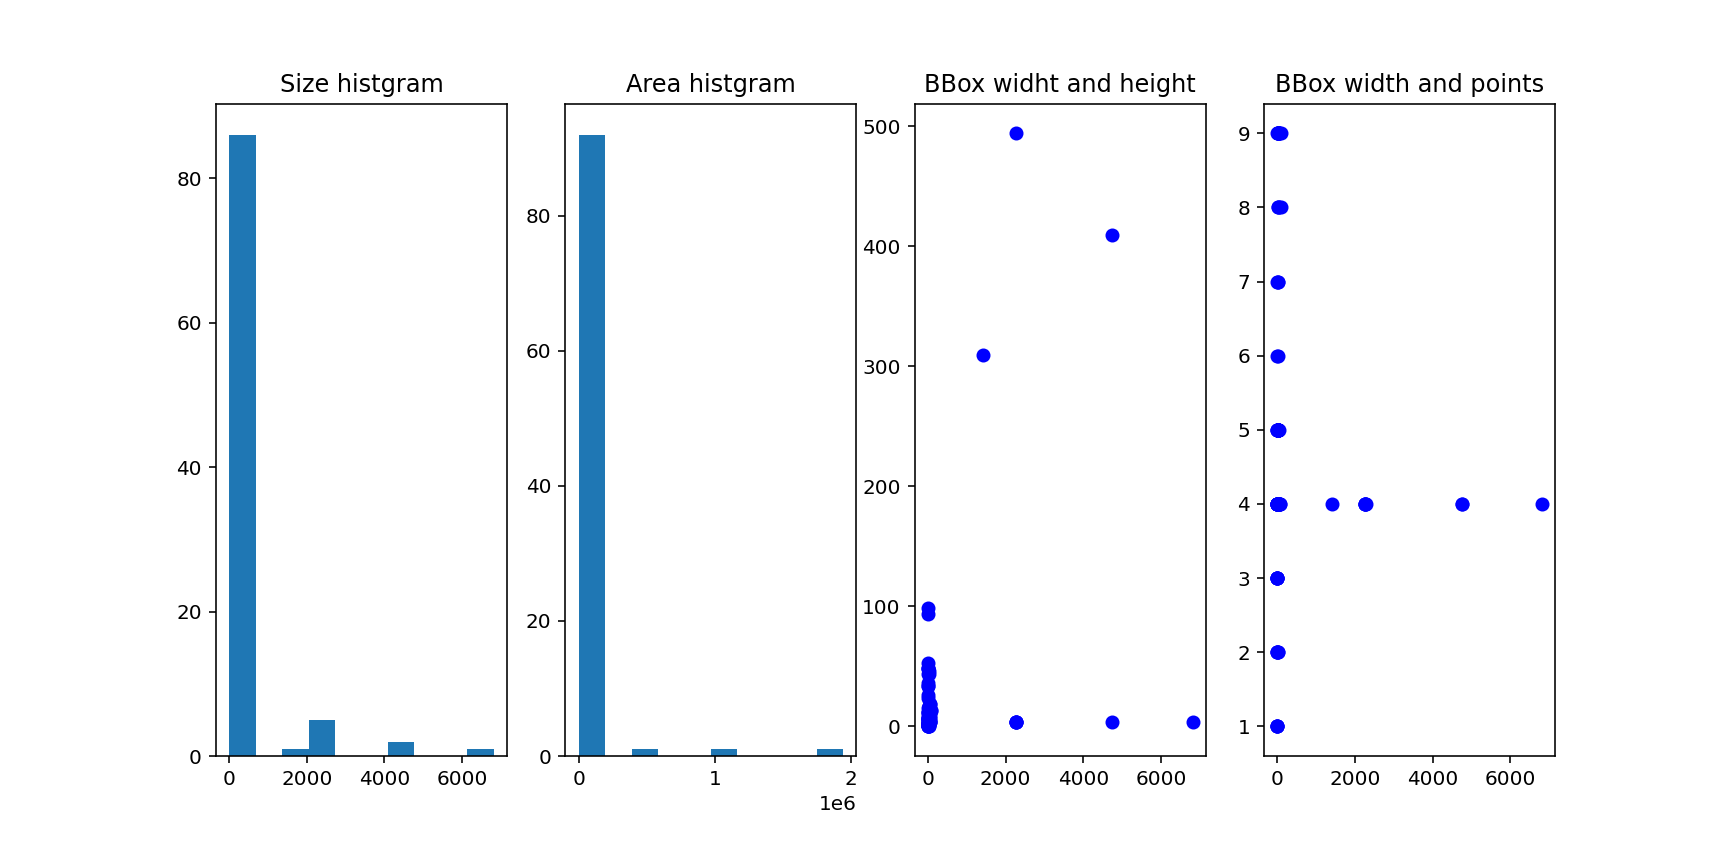

In [17]:
img_orig_np = np.asarray(img_orig)
img_orig_gray = cv2.cvtColor(img_orig_np, cv2.COLOR_RGB2GRAY)
ret, img_orig_bin = cv2.threshold(img_orig_gray, 210, 255, cv2.THRESH_BINARY_INV)
contours2, hierarchy2 = cv2.findContours(img_orig_bin, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours2_ext = tuple( (cont for i,cont in enumerate(contours2) if hierarchy2[0][i][3] == -1) )
contours2_square = tuple( (cont for i, cont in enumerate(contours2)
                           if hierarchy2[0][i][3] == -1 and cont.shape[0] < 10) )

def get_perimeter(bbox):
    return 2*(bbox[2]-bbox[0]) + 2*(bbox[3]-bbox[1])

def get_area(bbox):
    return (bbox[2]-bbox[0])*(bbox[3]-bbox[1])


# sizes = np.array([max(bbox[3]-bbox[1], bbox[2]-bbox[0]) for bbox in map(get_bbox, contours2_ext)])
# areas = np.array([cv2.contourArea(cont) for cont in contours2_ext])
# bbox_whs = np.array([(bbox[2]-bbox[0], bbox[3]-bbox[1]) for bbox in map(get_bbox, contours2_ext)])

# points = np.array([cont.shape[0] for cont in contours2_ext])
# perimeters = np.array([get_perimeter(bbox) for bbox in map(get_bbox, contours2_ext)])
# arclengths = np.array([cv2.arcLength(cont, True) for cont in contours2_ext])
# bbox_areas = np.array([get_area(bbox) for bbox in map(get_bbox, contours2_ext)])

sizes = np.array([max(bbox[3]-bbox[1], bbox[2]-bbox[0]) for bbox in map(get_bbox, contours2_square)])
areas = np.array([cv2.contourArea(cont) for cont in contours2_square])
bbox_whs = np.array([(bbox[2]-bbox[0], bbox[3]-bbox[1]) for bbox in map(get_bbox, contours2_square)])

points = np.array([cont.shape[0] for cont in contours2_square])
perimeters = np.array([get_perimeter(bbox) for bbox in map(get_bbox, contours2_square)])
arclengths = np.array([cv2.arcLength(cont, True) for cont in contours2_square])
bbox_areas = np.array([get_area(bbox) for bbox in map(get_bbox, contours2_square)])

wp = np.stack((bbox_whs[:,0], points), axis=1)
wha = np.c_[bbox_whs, areas.reshape(-1,1)]


%matplotlib notebook
plt.figure(figsize=(12,6))
plt.subplot(141)
plt.hist(sizes)
plt.title("Size histgram")
plt.subplot(142)
plt.hist(areas)
plt.title("Area histgram")
plt.subplot(143)
plt.plot(bbox_whs[:,0], bbox_whs[:,1], "bo")
plt.title("BBox widht and height")
plt.subplot(144)
plt.plot(wp[:,0], wp[:,1], "bo")
plt.title("BBox width and points")
plt.show()

<IPython.core.display.Javascript object>


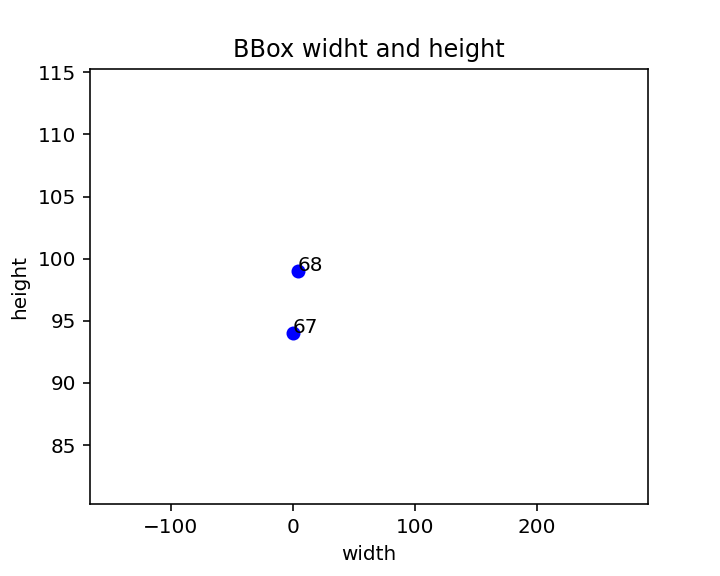

In [25]:
plt.figure(figsize=(5,4))
plt.plot(bbox_whs[:,0], bbox_whs[:,1], "bo")
for i, bbox in enumerate(bbox_whs):
    if bbox[0] > 500 or bbox[1] > 90:
        plt.text(bbox[0], bbox[1], i)
mean = bbox_whs.mean(axis=0)
plt.plot(mean[0], mean[1], "ro")
plt.title("BBox widht and height")
plt.xlabel("width"); plt.ylabel("height")
plt.show()

In [41]:
img_orig.crop((4533, 2740, 4534, 2834)).show()

In [30]:
get_bbox(contours2_square[67])

(4534, 2740, 4534, 2834)

In [84]:
foo
img_cp = np.full_like(img_orig_np, 255)
for i, cont in enumerate(contours2_ext):
    cv2.drawContours(img_cp, contours2_ext, i, 0, 1)
plt.figure(figsize=(10,8))
plt.imshow(img_cp)
plt.title("Contours where hierarchy[0][*][3] == -1")
plt.show()

NameError: name 'foo' is not defined

<IPython.core.display.Javascript object>


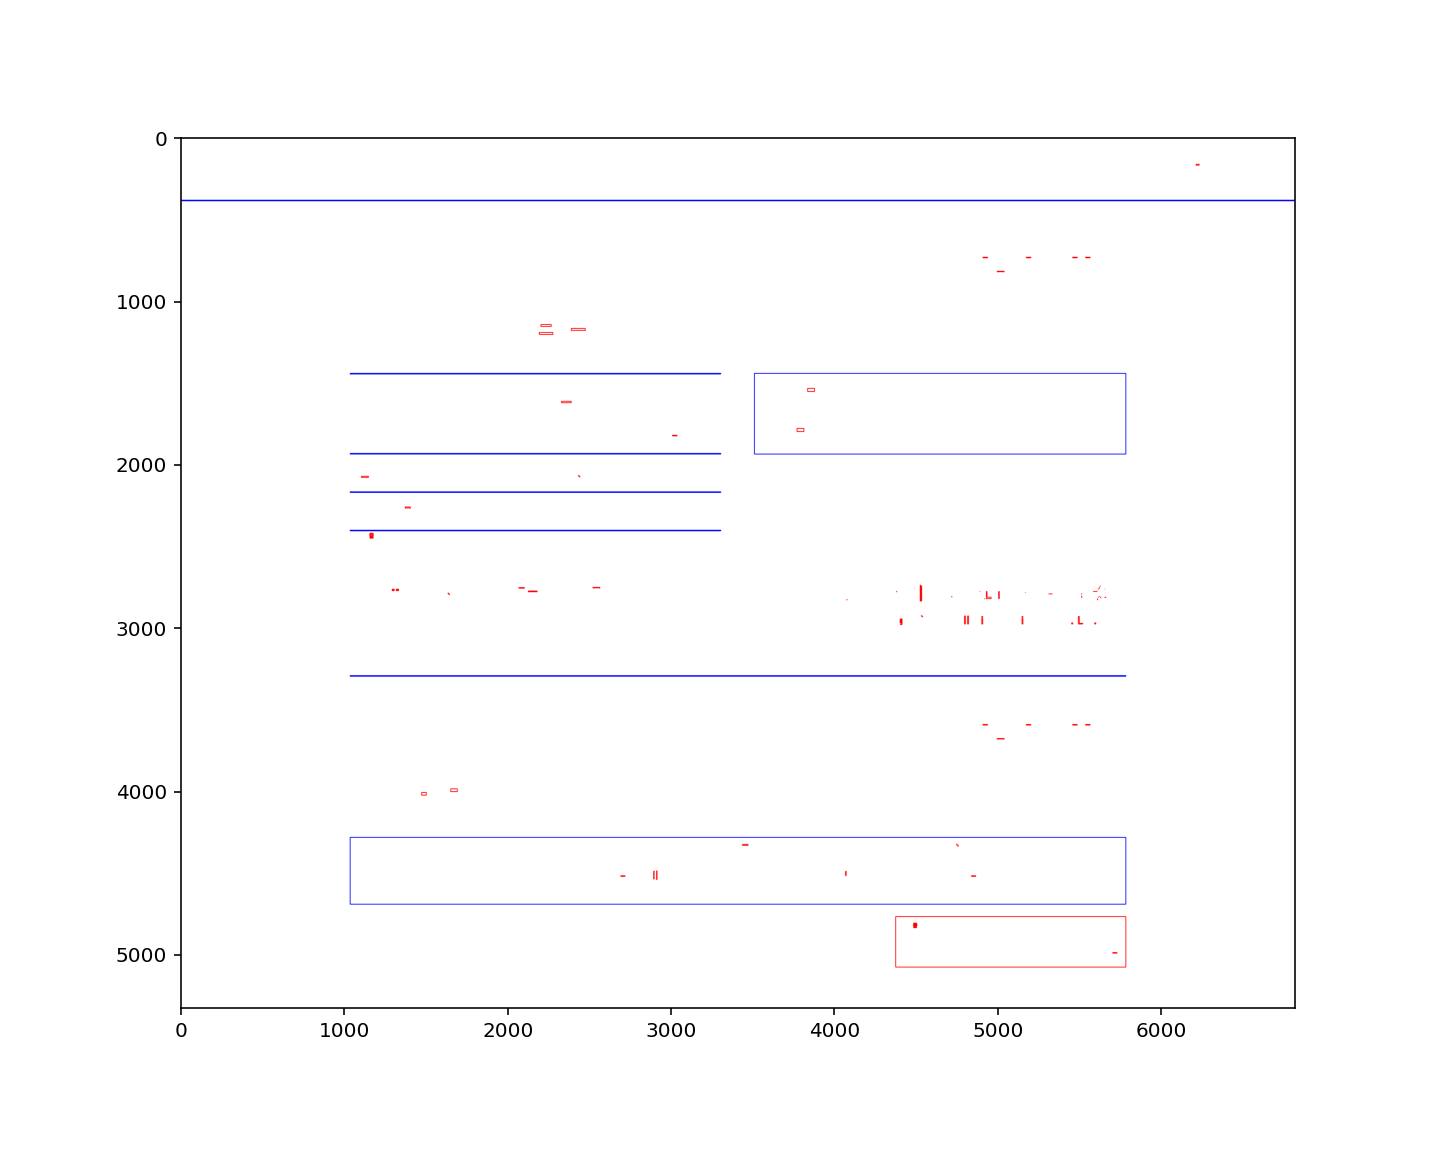

In [46]:
from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=2)
# y_pred1 = kmeans.fit_predict(sizes.reshape(-1,1))
# kmeans = KMeans(n_clusters=2)
# y_pred2 = kmeans.fit_predict(areas.reshape(-1,1))
kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(bbox_whs)
# kmeans = KMeans(n_clusters=2, n_init=10)
# y_pred = kmeans.fit_predict(wha)

img_cp = np.full_like(img_orig_np, 255)
colors = [(255,0,0),(0,0,255)]
# for i, cont in enumerate(contours2_ext):
#     cv2.drawContours(img_cp, contours2_ext, i, colors[y_pred[i]], 3)
# for i, cont in enumerate(contours2_ext):
#     if bbox_whs[i][0] < 600:
#         cv2.drawContours(img_cp, contours2_ext, i, (0,0,255), 3)
#     else:
#         cv2.drawContours(img_cp, contours2_ext, i, (255,0,0), 3)
for i, cont in enumerate(contours2_square):
    cv2.drawContours(img_cp, contours2_square, i, colors[y_pred[i]], 3)
plt.figure(figsize=(10,8))
plt.imshow(img_cp)
plt.show()

<IPython.core.display.Javascript object>


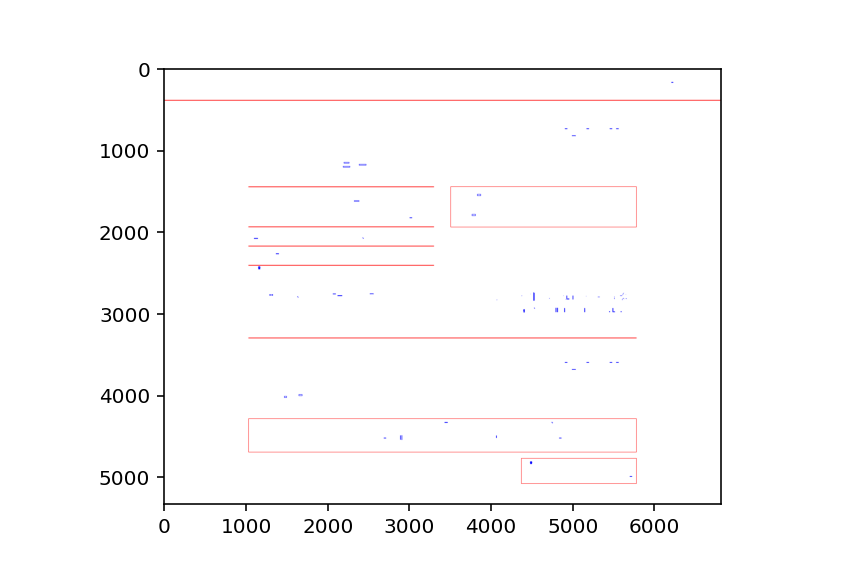

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

dbscan = DBSCAN(eps=50, min_samples=5)
dbscan.fit(bbox_whs)


img_cp = np.full_like(img_orig_np, 255)
for i, cont in enumerate(contours2_square):
    if dbscan.labels_[i] != -1:
        cv2.drawContours(img_cp, contours2_square, i, (0,0,255), 3)
    else:
        cv2.drawContours(img_cp, contours2_square, i, (255,0,0), 3)
plt.imshow(img_cp)
plt.show()

<IPython.core.display.Javascript object>


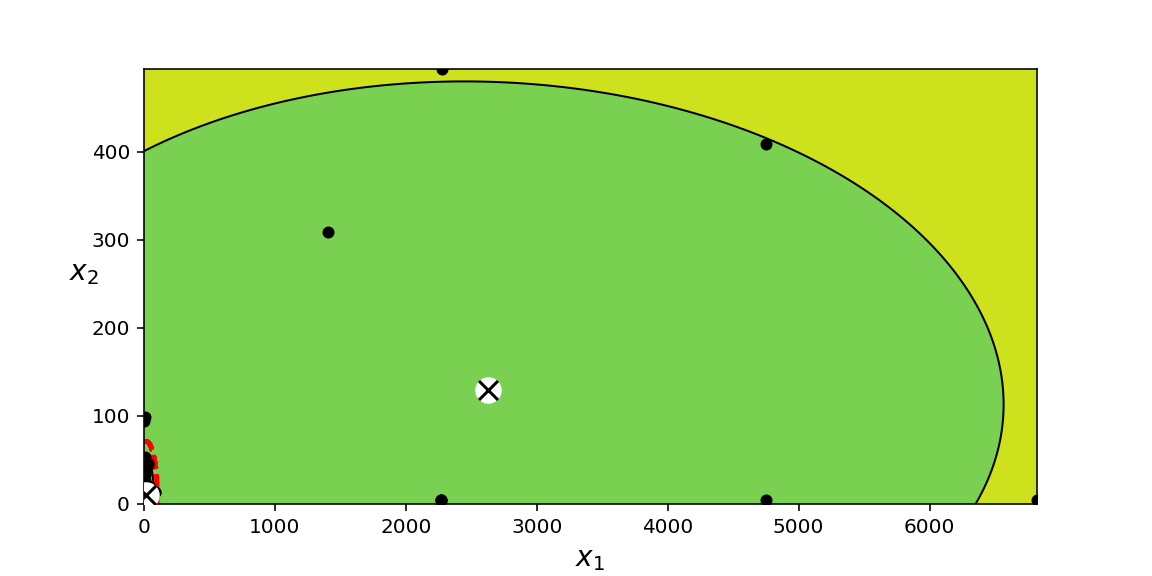

In [48]:
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm



def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:,0], X[:,1], 'k.', markersize=10)
    plt.scatter(gm.means_[:,0], gm.means_[:,1], color='w', marker='o', s=150, zorder=10)
    plt.scatter(gm.means_[:,0], gm.means_[:,1], color='k', marker='x', s=90, zorder=11)
    
    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


gm = GaussianMixture(n_components=2, n_init=10)
gm.fit(bbox_whs)

plt.figure(figsize=(8,4))
plot_gaussian_mixture(gm, bbox_whs)
plt.show()

In [49]:
mean = bbox_whs.mean(axis=0)
print(mean)

[322.88421053  24.16842105]


<IPython.core.display.Javascript object>


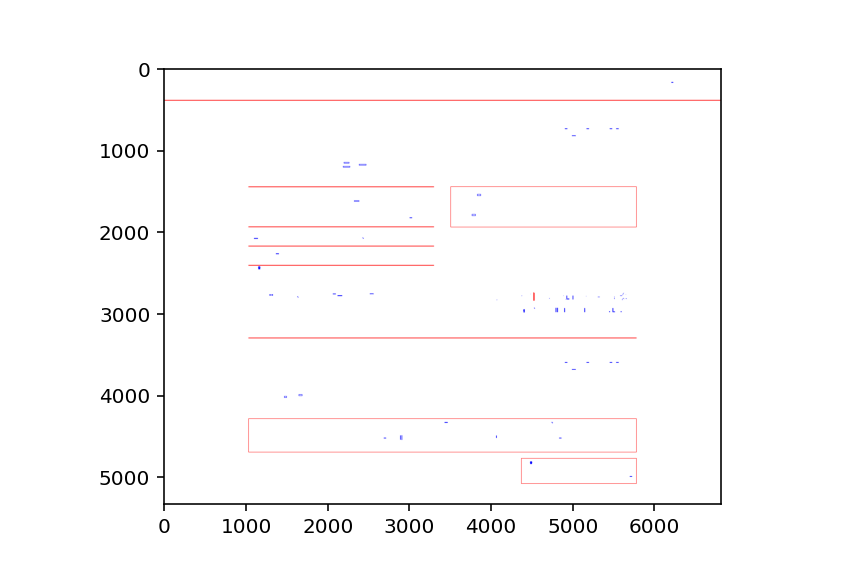

In [50]:
img_cp = np.full_like(img_orig_np, 255)
for i, cont in enumerate(contours2_square):
    if gm.predict([bbox_whs[i]])[0] == 0:
        cv2.drawContours(img_cp, contours2_square, i, (0,0,255), 3)
    else:
        cv2.drawContours(img_cp, contours2_square, i, (255,0,0), 3)
plt.imshow(img_cp)
plt.show()

In [85]:
foo
doc3 = fitz.open("resource/health.pdf")
page3 = doc3[0]

img3_pil = Image.open(io.BytesIO(page3.get_pixmap(matrix=fitz.Matrix(5.0,5.0)).tobytes()))
img3 = np.asarray(img3_pil)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
_, img3_bin_inv = cv2.threshold(img3_gray, 210, 255, cv2.THRESH_BINARY_INV)

plt.imshow(img3_bin_inv, cmap="gray"); plt.show()

NameError: name 'foo' is not defined

<IPython.core.display.Javascript object>


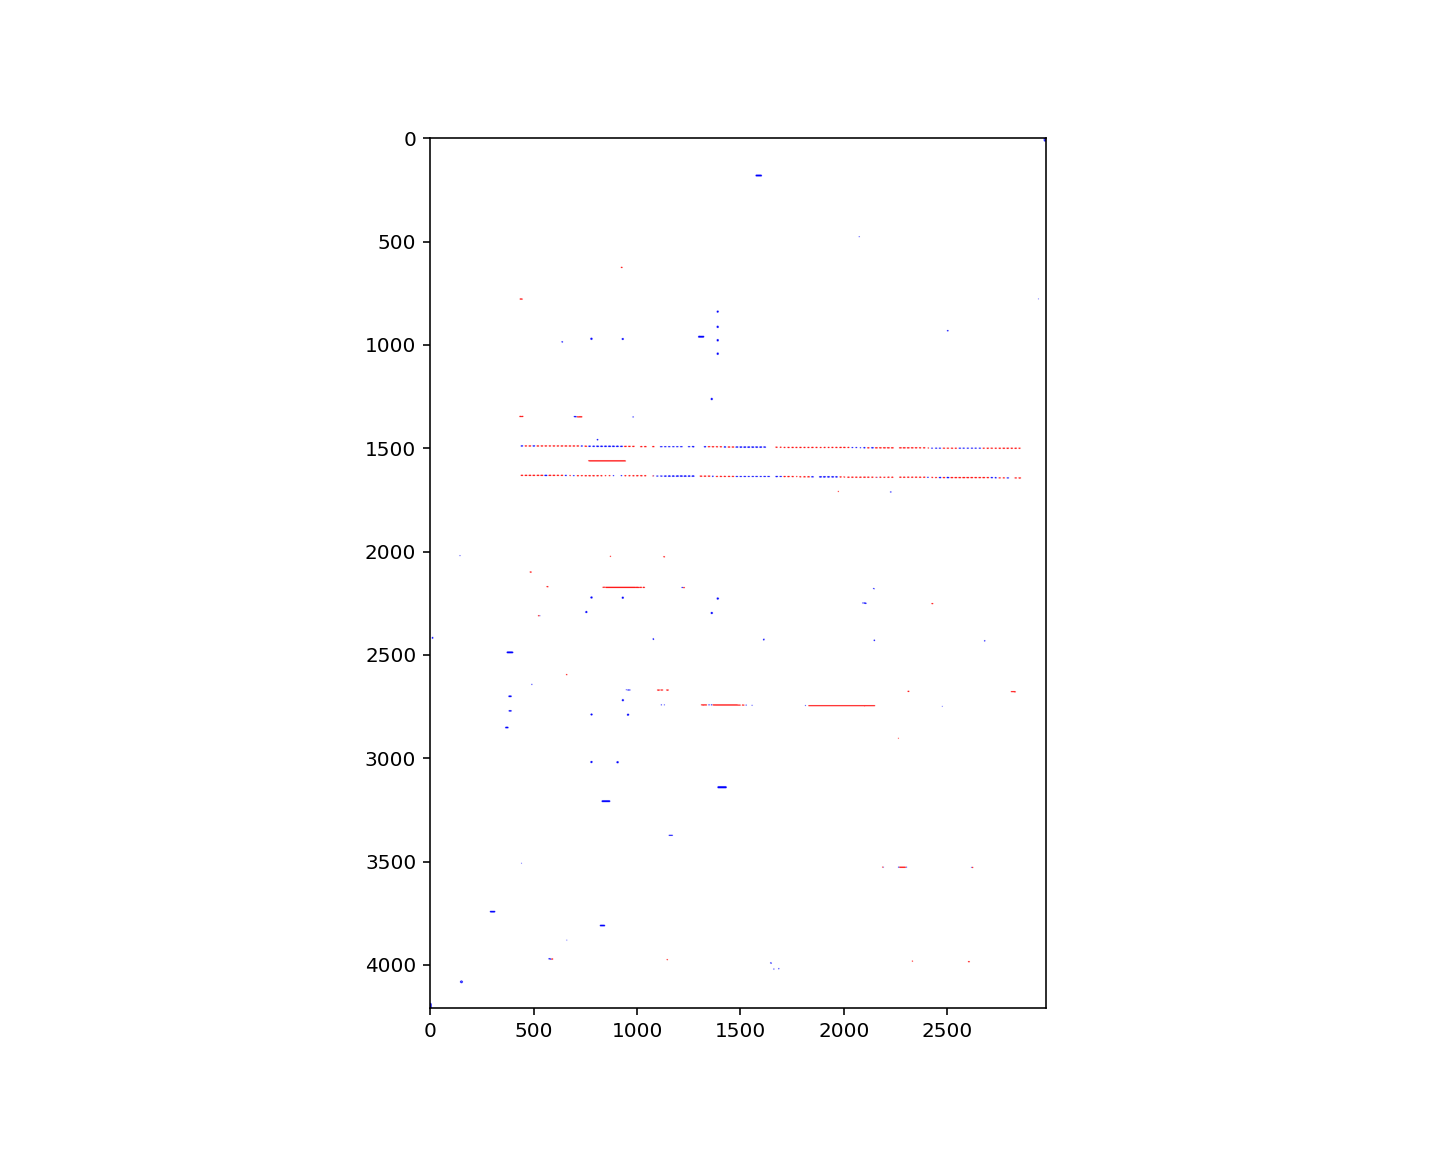

In [78]:
contours3, hierarchy3 = cv2.findContours(img3_bin_inv, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours3_ext = tuple( (cont for i,cont in enumerate(contours3) 
                        if hierarchy3[0][i][3] == -1) )
contours3_square = tuple( (cont for i,cont in enumerate(contours3)
                           if hierarchy3[0][i][3] == -1 and cont.shape[0] < 10) )
bbox_whs3 = np.array([(bbox[2]-bbox[0], bbox[3]-bbox[1]) for bbox in map(get_bbox, contours3_square)])
gm3 = GaussianMixture(n_components=2, n_init=10)
gm3.fit(bbox_whs3)

img_cp3 = np.full_like(img3, 255)
for i, cont in enumerate(contours3_square):
    if gm3.predict([bbox_whs3[i]])[0] == 0:
        cv2.drawContours(img_cp3, contours3_square, i, (0,0,255), 3)
    else:
        cv2.drawContours(img_cp3, contours3_square, i, (255,0,0), 3)
plt.figure(figsize=(10,8))
plt.imshow(img_cp3)
plt.show()

In [86]:
foo
img3_dilate = cv2.dilate(img3_bin_inv, kernel=np.ones((5,5), np.uint8))
contours4, hierarchy4 = cv2.findContours(img3_dilate, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours4_ext = tuple( (cont for i,cont in enumerate(contours4) 
                        if hierarchy4[0][i][3] == -1) )
img_cp4 = np.full_like(img3, 255)
for i, cont in enumerate(contours4_ext):
    cv2.drawContours(img_cp4, contours4_ext, i, 0, 3)
plt.figure(figsize=(10,8))
plt.imshow(img_cp4)
plt.show()

NameError: name 'foo' is not defined

<IPython.core.display.Javascript object>


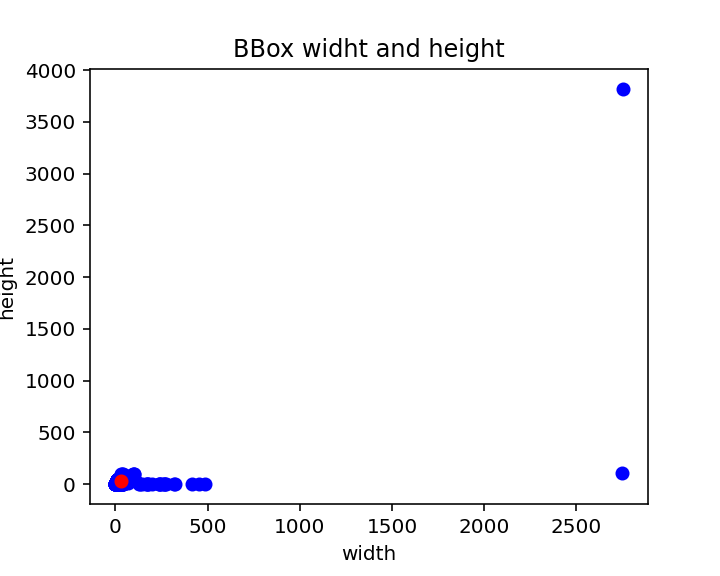

In [72]:
bbox_whs3_all = np.array([(bbox[2]-bbox[0], bbox[3]-bbox[1]) for bbox in map(get_bbox, contours3_ext)])
plt.figure(figsize=(5,4))
plt.plot(bbox_whs3_all[:,0], bbox_whs3_all[:,1], "bo")
# for i, bbox in enumerate(bbox_whs3_all):
#     if bbox[0] > 500 or bbox[1] > 90:
#         plt.text(bbox[0], bbox[1], i)
mean = bbox_whs3_all.mean(axis=0)
plt.plot(mean[0], mean[1], "ro")
plt.title("BBox widht and height")
plt.xlabel("width"); plt.ylabel("height")
plt.show()

<IPython.core.display.Javascript object>


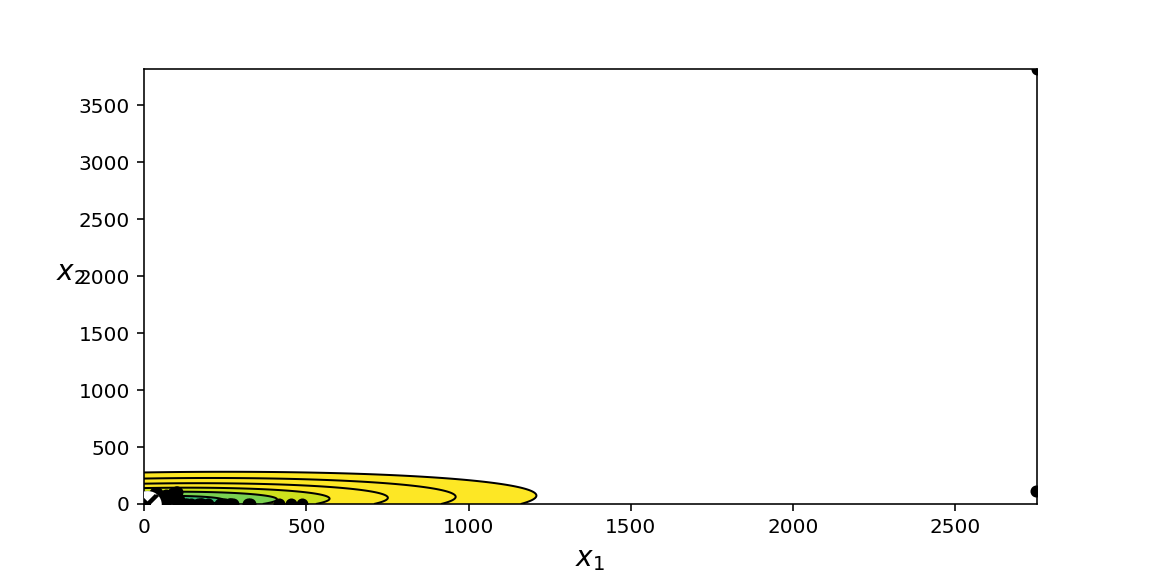

In [73]:
gm3 = GaussianMixture(n_components=2, n_init=10)
gm3.fit(bbox_whs3_all)

plt.figure(figsize=(8,4))
plot_gaussian_mixture(gm3, bbox_whs3_all)
plt.show()

In [87]:
foo
img_cp = np.full_like(img3, 255)
for i, cont in enumerate(contours3_ext):
    if gm3.predict([bbox_whs3_all[i]])[0] == 0:
        cv2.drawContours(img_cp, contours3_ext, i, (0,0,255), 3)
    else:
        cv2.drawContours(img_cp, contours3_ext, i, (255,0,0), 3)
plt.imshow(img_cp)
plt.show()

NameError: name 'foo' is not defined